In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [29]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# convert all catogorical data into numerical data using LabeledEncoder and loop

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [40]:
x = data.iloc[:,:-1]  # Using 'total_bill' as feature
y = data["tip"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [41]:
model = KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [42]:
#evaluation model
# print("Predicted values:", y_pred)
# print("Actual values:", y_test.values)
print("Mean Absolute Error:", np.mean(np.abs(y_pred - y_test)))
print("Mean Squared Error:", np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error:", np.sqrt(np.mean((y_pred - y_test)) ** 2))
print("R2 Score:", model.score(x_test, y_test))



Mean Absolute Error: 0.45167346938775516
Mean Squared Error: 0.6588045714285714
Root Mean Squared Error: 0.20016326530612252
R2 Score: 0.7011596252822028


Text(0, 0.5, 'Tip')

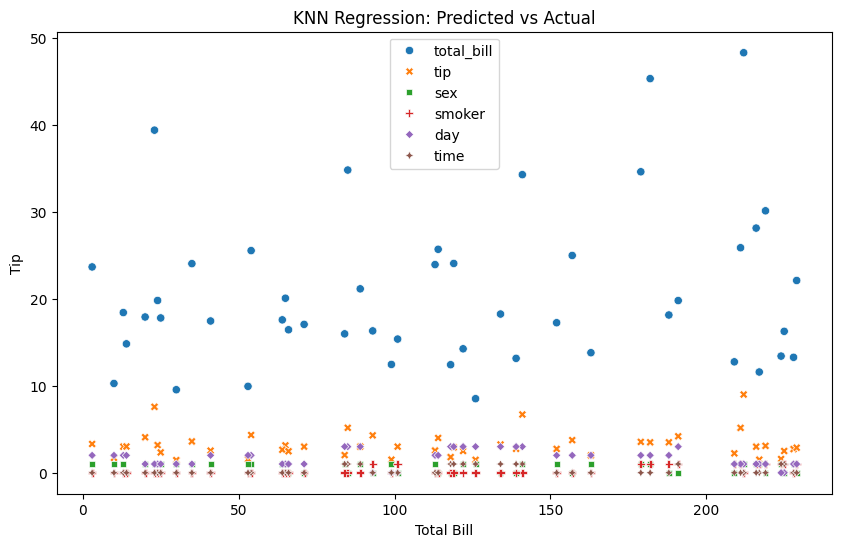

In [47]:
# evaluation model graphical
plt.figure(figsize=(10, 6))
sns.scatterplot(x_test,)
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Total Bill')
plt.ylabel('Tip')


In [50]:
# save model
pickle.dump(model, open('./saved_models/KNNR_06.pkl', 'wb'))
